# **Student Score Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Set style for better visualizations

In [2]:
plt.style.use('default')
sns.set_palette("husl")

Load the dataset

In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')

Explore the dataset

In [4]:
print("    DATASET OVERVIEW    ")
print(f"Dataset shape: {df.shape}")
print(f"Total students: {len(df)}")

print("\n    COLUMN INFO    ")
print(df.info())

    DATASET OVERVIEW    
Dataset shape: (6607, 20)
Total students: 6607

    COLUMN INFO    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type

In [5]:
print("      FIRST 5 ROWS")
print(df.head())

print("\n    BASIC STATISTICS")
print(df.describe())

print("\n    MISSING VALUES")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found!")

      FIRST 5 ROWS
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality 

Data cleaning

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

Duplicate rows: 0


**Handle missing values (if present)**

In [7]:
if df.isnull().sum().sum() > 0:
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("Data cleaning completed!")
print(f"Final dataset shape: {df.shape}")

Data cleaning completed!
Final dataset shape: (6607, 20)


**Numerical Data Visualization**

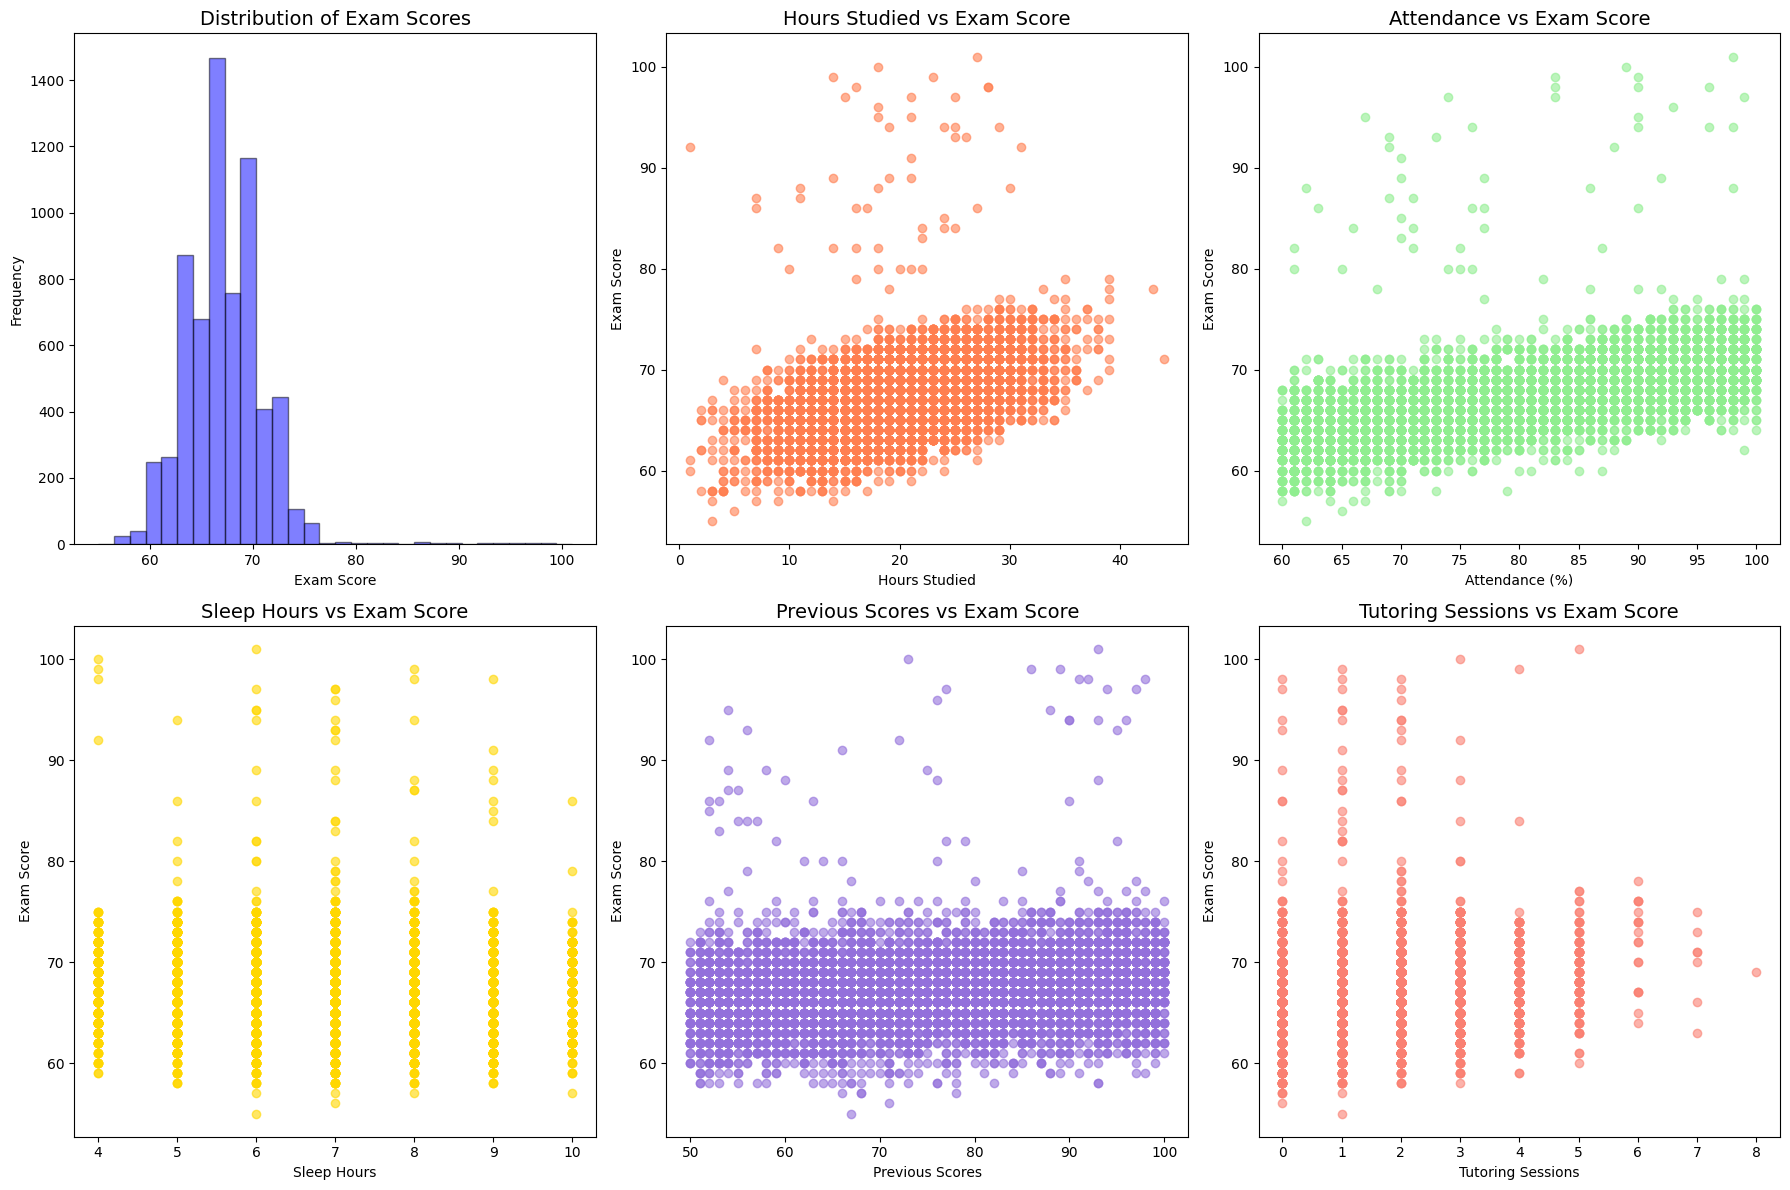

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution of Exam Scores
axes[0, 0].hist(df['Exam_Score'], bins=30, edgecolor='black', alpha=0.5, color='blue')
axes[0, 0].set_title('Distribution of Exam Scores', fontsize=14)
axes[0, 0].set_xlabel('Exam Score')
axes[0, 0].set_ylabel('Frequency')

# Hours Studied vs Exam Score
axes[0, 1].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='coral')
axes[0, 1].set_title('Hours Studied vs Exam Score', fontsize=14)
axes[0, 1].set_xlabel('Hours Studied')
axes[0, 1].set_ylabel('Exam Score')

# Attendance vs Exam Score
axes[0, 2].scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='lightgreen')
axes[0, 2].set_title('Attendance vs Exam Score', fontsize=14)
axes[0, 2].set_xlabel('Attendance (%)')
axes[0, 2].set_ylabel('Exam Score')

# Sleep Hours vs Exam Score
axes[1, 0].scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='gold')
axes[1, 0].set_title('Sleep Hours vs Exam Score', fontsize=14)
axes[1, 0].set_xlabel('Sleep Hours')
axes[1, 0].set_ylabel('Exam Score')

# Previous Scores vs Exam Score
axes[1, 1].scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='mediumpurple')
axes[1, 1].set_title('Previous Scores vs Exam Score', fontsize=14)
axes[1, 1].set_xlabel('Previous Scores')
axes[1, 1].set_ylabel('Exam Score')

# Tutoring Sessions vs Exam Score
axes[1, 2].scatter(df['Tutoring_Sessions'], df['Exam_Score'], alpha=0.6, color='salmon')
axes[1, 2].set_title('Tutoring Sessions vs Exam Score', fontsize=14)
axes[1, 2].set_xlabel('Tutoring Sessions')
axes[1, 2].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

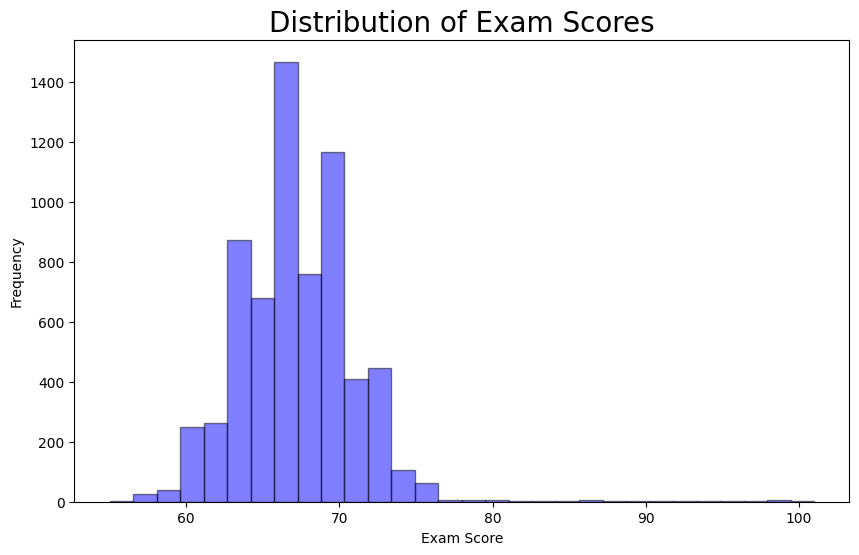

In [9]:
fig, a = plt.subplots(figsize=(10, 6))
a.hist(df['Exam_Score'], bins=30, edgecolor='black', alpha=0.5, color='blue')
a.set_title('Distribution of Exam Scores', fontsize=20)
a.set_xlabel('Exam Score')
a.set_ylabel('Frequency')

**Categorical Data visualization**

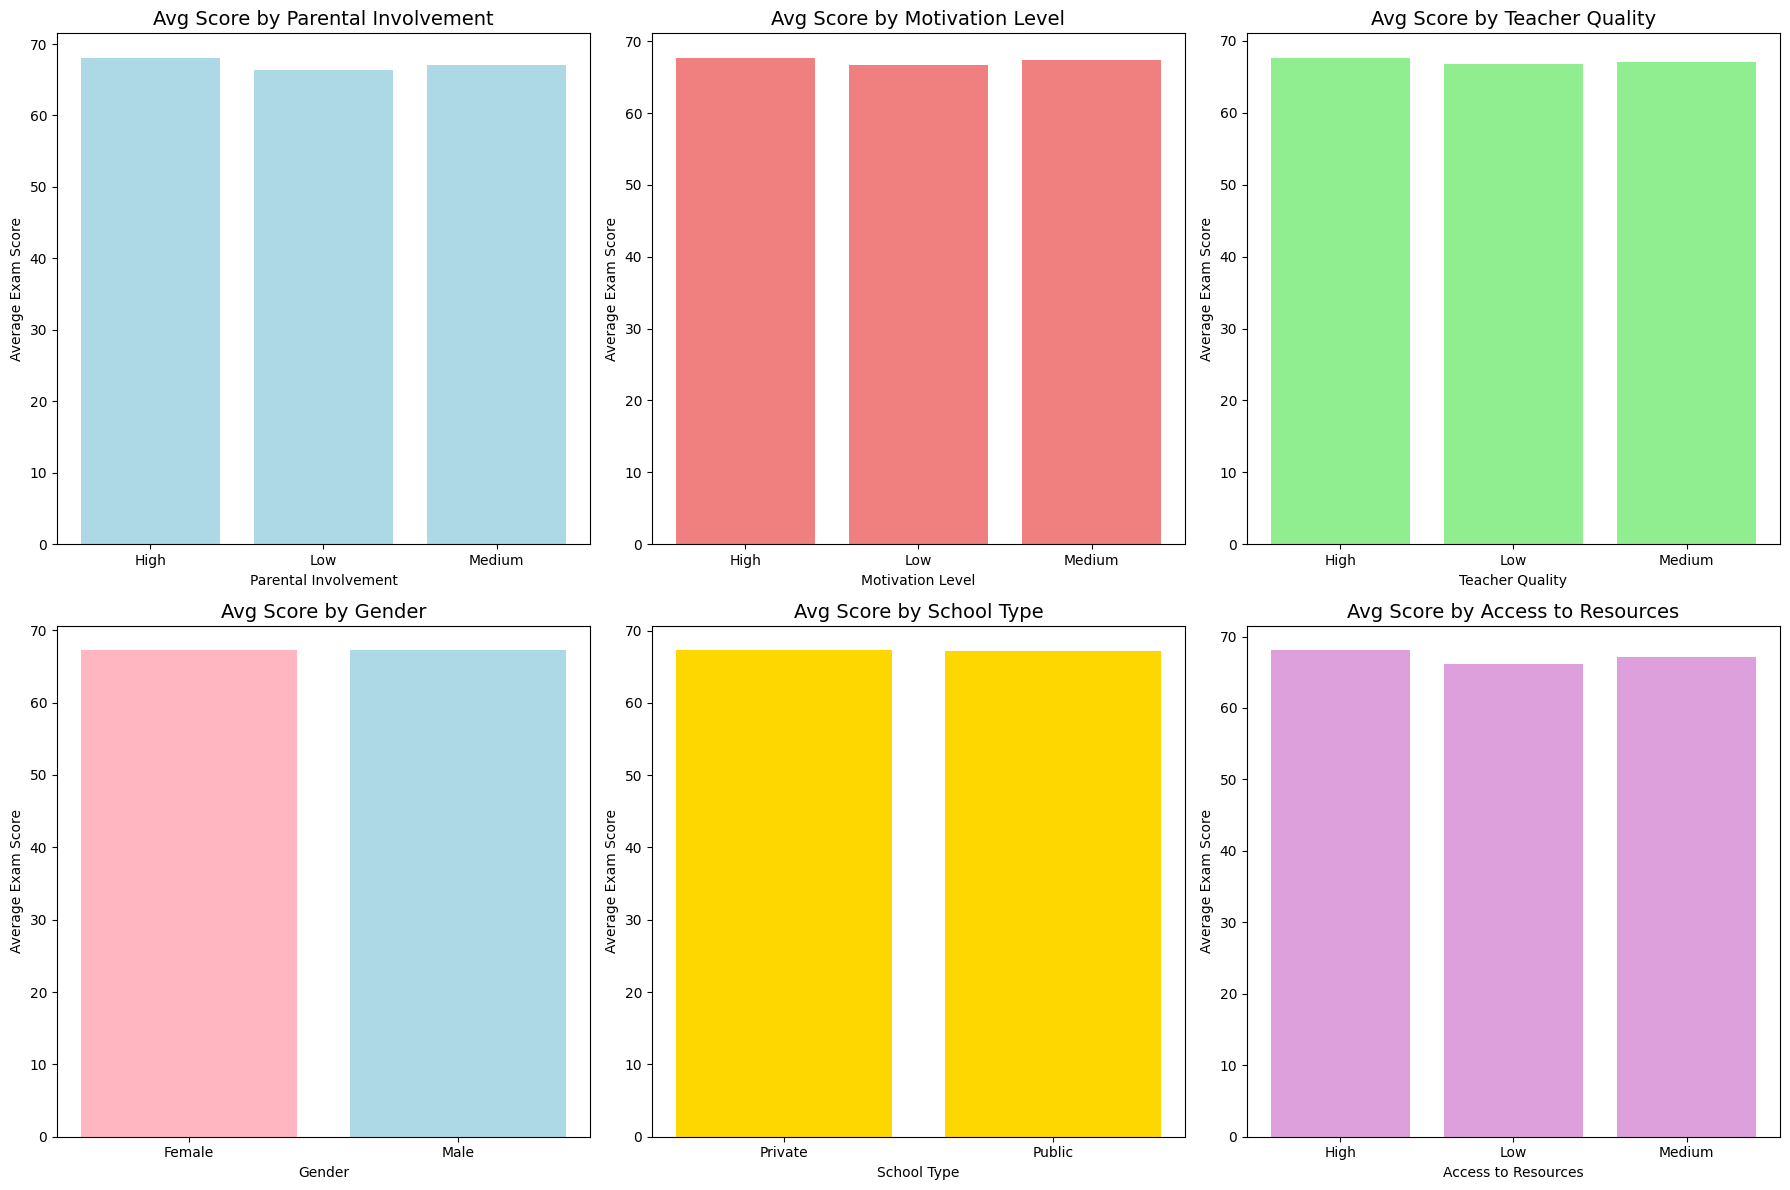

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Parental Involvement Impact
parental_scores = df.groupby('Parental_Involvement')['Exam_Score'].mean()
axes[0, 0].bar(parental_scores.index, parental_scores.values, color='lightblue')
axes[0, 0].set_title('Avg Score by Parental Involvement', fontsize=14)
axes[0, 0].set_xlabel('Parental Involvement')
axes[0, 0].set_ylabel('Average Exam Score')

# Motivation Level Impact
motivation_scores = df.groupby('Motivation_Level')['Exam_Score'].mean()
axes[0, 1].bar(motivation_scores.index, motivation_scores.values, color='lightcoral')
axes[0, 1].set_title('Avg Score by Motivation Level', fontsize=14)
axes[0, 1].set_xlabel('Motivation Level')
axes[0, 1].set_ylabel('Average Exam Score')

# Teacher Quality Impact
teacher_scores = df.groupby('Teacher_Quality')['Exam_Score'].mean()
axes[0, 2].bar(teacher_scores.index, teacher_scores.values, color='lightgreen')
axes[0, 2].set_title('Avg Score by Teacher Quality', fontsize=14)
axes[0, 2].set_xlabel('Teacher Quality')
axes[0, 2].set_ylabel('Average Exam Score')

# Gender Impact
gender_scores = df.groupby('Gender')['Exam_Score'].mean()
axes[1, 0].bar(gender_scores.index, gender_scores.values, color=['lightpink', 'lightblue'])
axes[1, 0].set_title('Avg Score by Gender', fontsize=14)
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Average Exam Score')

# School Type Impact
school_scores = df.groupby('School_Type')['Exam_Score'].mean()
axes[1, 1].bar(school_scores.index, school_scores.values, color='gold')
axes[1, 1].set_title('Avg Score by School Type', fontsize=14)
axes[1, 1].set_xlabel('School Type')
axes[1, 1].set_ylabel('Average Exam Score')

# Access to Resources Impact
resource_scores = df.groupby('Access_to_Resources')['Exam_Score'].mean()
axes[1, 2].bar(resource_scores.index, resource_scores.values, color='plum')
axes[1, 2].set_title('Avg Score by Access to Resources', fontsize=14)
axes[1, 2].set_xlabel('Access to Resources')
axes[1, 2].set_ylabel('Average Exam Score')

plt.tight_layout()
plt.show()


**Correlation analysis**

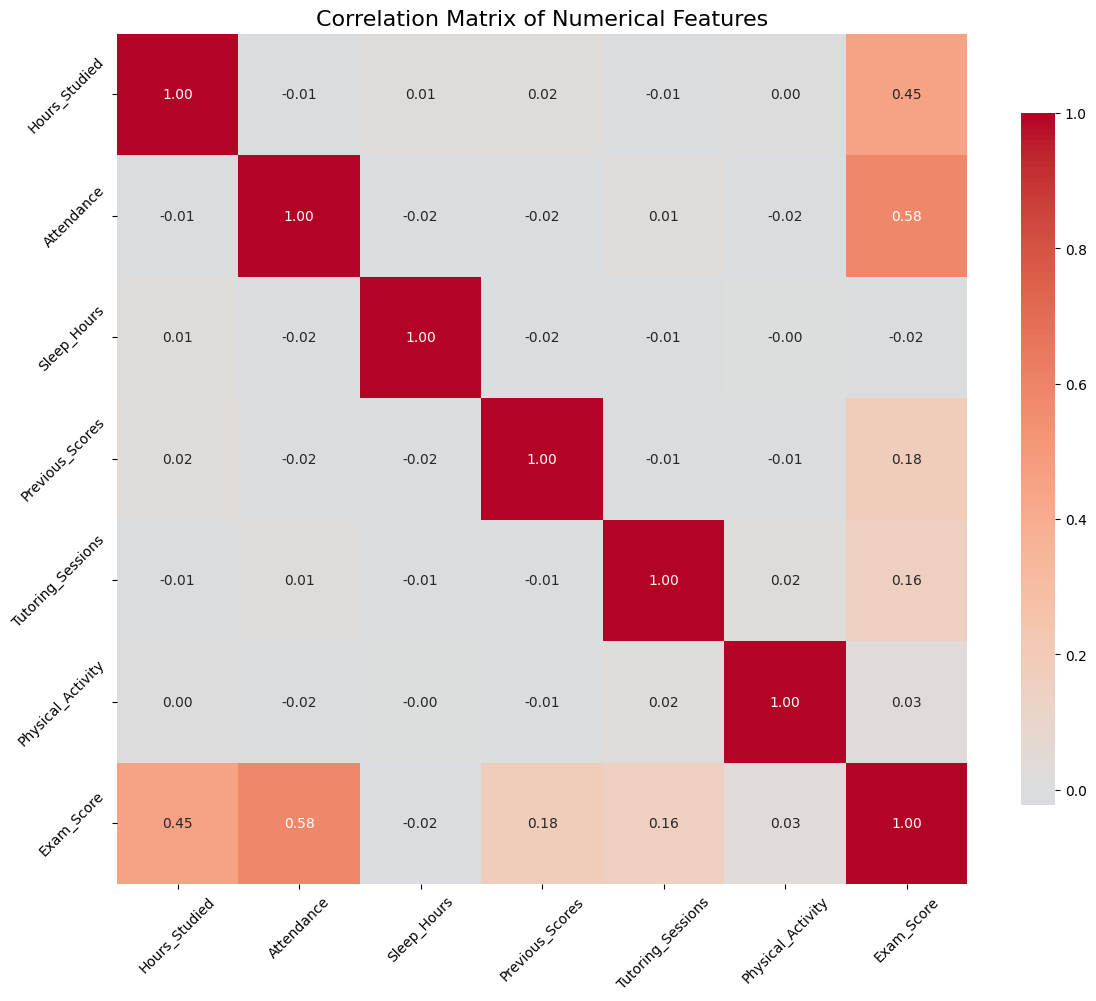

=== CORRELATION WITH EXAM SCORE ===
Attendance: 0.581
Hours_Studied: 0.445
Previous_Scores: 0.175
Tutoring_Sessions: 0.157
Physical_Activity: 0.028
Sleep_Hours: -0.017


In [11]:
# Create correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Print correlation with target variable
print("=== CORRELATION WITH EXAM SCORE ===")
correlations = correlation_matrix['Exam_Score'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'Exam_Score':
        print(f"{feature}: {corr:.3f}")

**For machine learning**


In [12]:
# Separate features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Handle categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"Categorical columns to encode: {list(categorical_columns)}")

# Create label encoders
label_encoders = {}
X_processed = X.copy()

# Encode categorical variables
for col in categorical_columns:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_processed[col])
    label_encoders[col] = le

print(f"Total features after encoding: {len(X_processed.columns)}")
print(f"Features: {list(X_processed.columns)}")

Categorical columns to encode: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Total features after encoding: 19
Features: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


---*Split the dataset*




In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]} features")

Training set size: 5285 samples
Testing set size: 1322 samples
Feature dimensions: 19 features




---*Scale the features*



In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Testing features shape: {X_test_scaled.shape}")

Features scaled successfully!
Training features shape: (5285, 19)
Testing features shape: (1322, 19)




---*Train the linear regression model*



In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Model training completed!")
print(f"Model coefficients shape: {model.coef_.shape}")


Model training completed!
Model coefficients shape: (19,)




---*Model evaluation*



In [16]:
# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("=== MODEL PERFORMANCE ===")
print("Training Set:")
print(f"  MAE: {train_mae:.3f}")
print(f"  MSE: {train_mse:.3f}")
print(f"  RMSE: {train_rmse:.3f}")
print(f"  R² Score: {train_r2:.3f}")

print("\nTesting Set:")
print(f"  MAE: {test_mae:.3f}")
print(f"  MSE: {test_mse:.3f}")
print(f"  RMSE: {test_rmse:.3f}")
print(f"  R² Score: {test_r2:.3f}")

=== MODEL PERFORMANCE ===
Training Set:
  MAE: 1.073
  MSE: 5.490
  RMSE: 2.343
  R² Score: 0.643

Testing Set:
  MAE: 1.016
  MSE: 4.399
  RMSE: 2.097
  R² Score: 0.689


**Feature importance analysis**

=== TOP 10 MOST IMPORTANT FEATURES ===
Attendance: 2.278
Hours_Studied: 1.730
Previous_Scores: 0.693
Tutoring_Sessions: 0.620
Peer_Influence: 0.405
Parental_Involvement: -0.387
Access_to_Resources: -0.352
Distance_from_Home: 0.314
Extracurricular_Activities: 0.279
Learning_Disabilities: -0.274


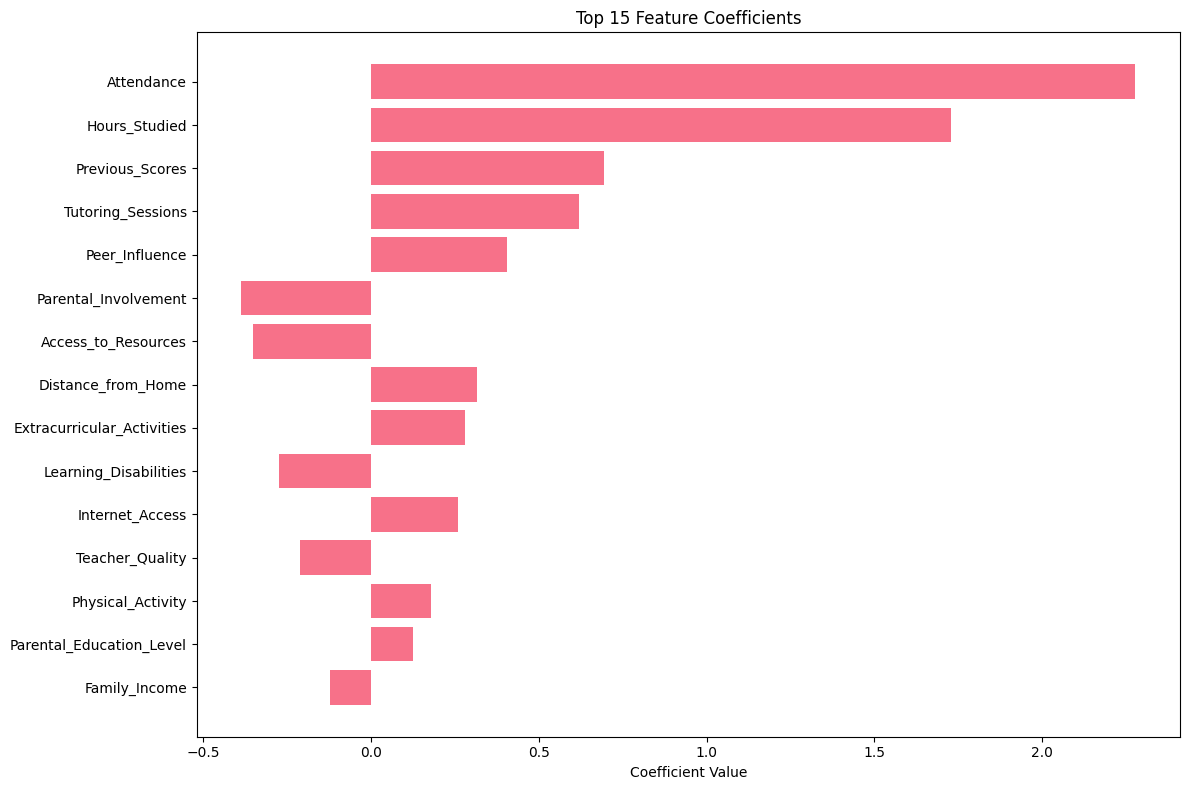

In [17]:
feature_importance = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("=== TOP 10 MOST IMPORTANT FEATURES ===")
for i, row in feature_importance.head(10).iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.3f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Prediction visualization**

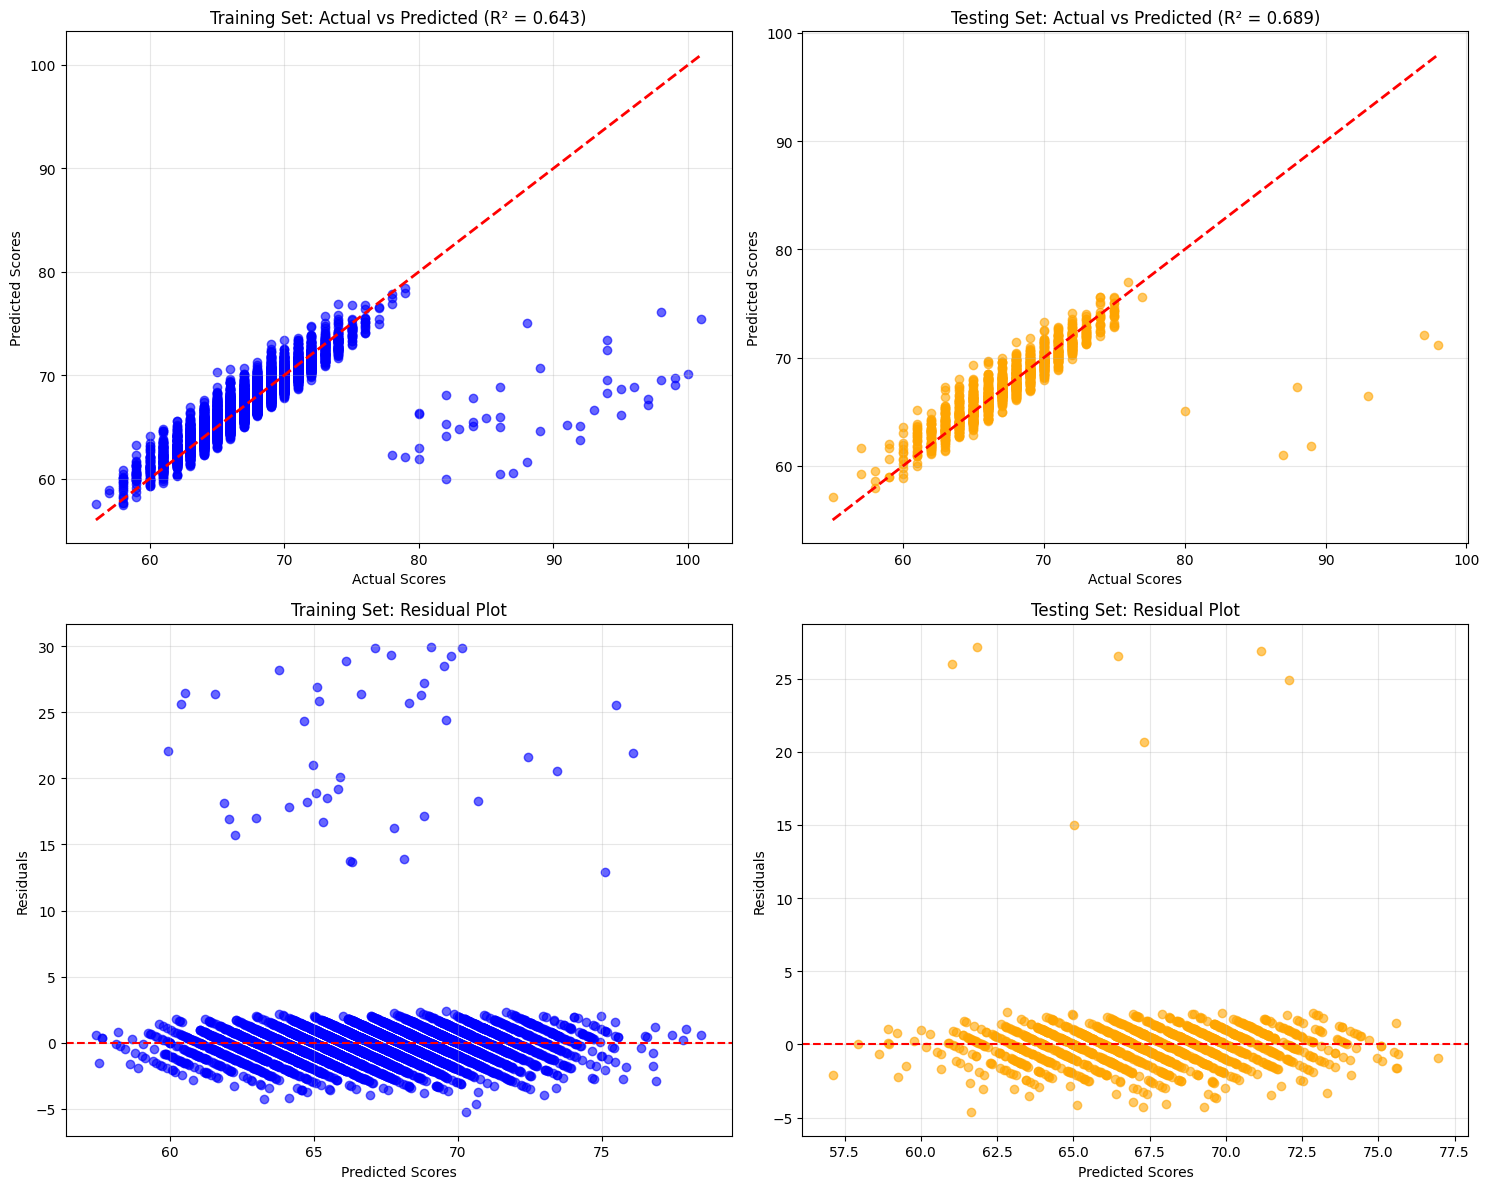

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()],
               [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Scores')
axes[0, 0].set_ylabel('Predicted Scores')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted (R² = {train_r2:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()],
               [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Scores')
axes[0, 1].set_ylabel('Predicted Scores')
axes[0, 1].set_title(f'Testing Set: Actual vs Predicted (R² = {test_r2:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals (Training)
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Scores')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals (Testing)
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Scores')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Testing Set: Residual Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Distribution comparison**

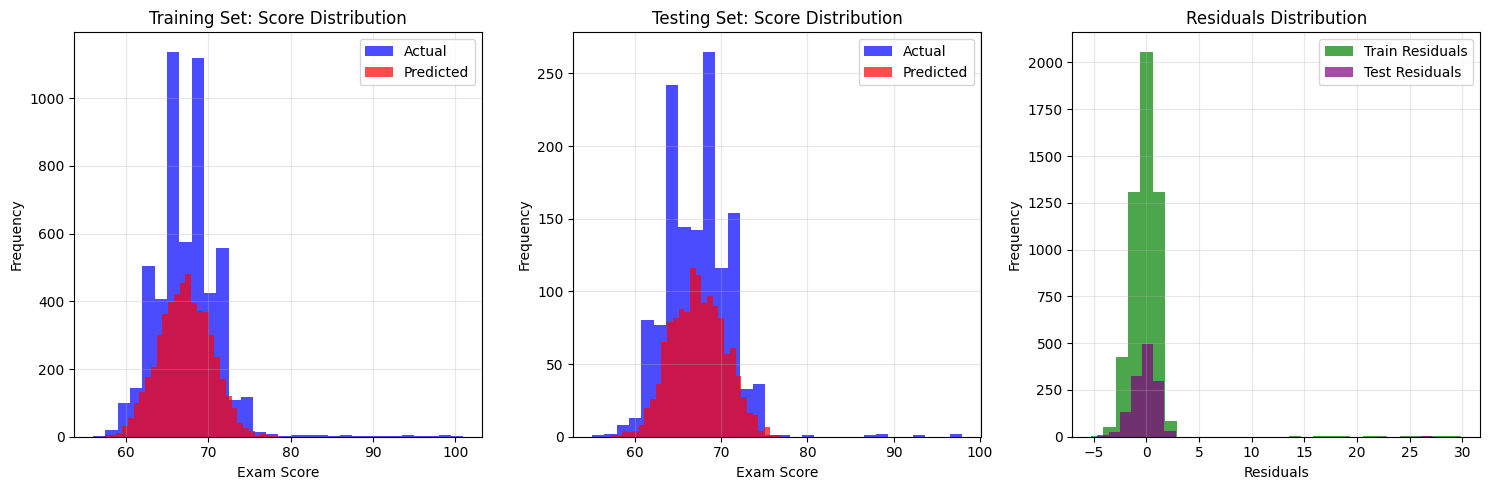

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, alpha=0.7, label='Actual', color='blue')
plt.hist(y_train_pred, bins=30, alpha=0.7, label='Predicted', color='red')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Training Set: Score Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(y_test, bins=30, alpha=0.7, label='Actual', color='blue')
plt.hist(y_test_pred, bins=30, alpha=0.7, label='Predicted', color='red')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Testing Set: Score Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(train_residuals, bins=30, alpha=0.7, color='green', label='Train Residuals')
plt.hist(test_residuals, bins=30, alpha=0.7, color='purple', label='Test Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**prediction for new student**

In [20]:
# Function to predict for new student
def predict_new_student(new_data):
    # Convert to DataFrame
    new_df = pd.DataFrame([new_data])

    # Encode categorical variables using saved encoders
    for col in new_df.columns:
        if col in label_encoders:
            new_df[col] = label_encoders[col].transform(new_df[col])

    # Scale features
    new_scaled = scaler.transform(new_df)

    # Make prediction
    prediction = model.predict(new_scaled)[0]
    return prediction

# Example student data
example_student = {
    'Hours_Studied': 25,
    'Attendance': 90,
    'Parental_Involvement': 'High',
    'Access_to_Resources': 'High',
    'Extracurricular_Activities': 'Yes',
    'Sleep_Hours': 8,
    'Previous_Scores': 85,
    'Motivation_Level': 'High',
    'Internet_Access': 'Yes',
    'Tutoring_Sessions': 2,
    'Family_Income': 'Medium',
    'Teacher_Quality': 'High',
    'School_Type': 'Public',
    'Peer_Influence': 'Positive',
    'Physical_Activity': 4,
    'Learning_Disabilities': 'No',
    'Parental_Education_Level': 'College',
    'Distance_from_Home': 'Near',
    'Gender': 'Female'
}

predicted_score = predict_new_student(example_student)
print("=== EXAMPLE PREDICTION ===")
print(f"Predicted exam score for example student: {predicted_score:.2f}")


=== EXAMPLE PREDICTION ===
Predicted exam score for example student: 73.87


**Model summary**

In [25]:
print("=== MODEL SUMMARY ===")
print(f"• Dataset: {df.shape[0]} students with {df.shape[1]-1} features")
print(f"• Model: Linear Regression")
print(f"• Training R² Score: {train_r2:.3f}")
print(f"• Testing R² Score: {test_r2:.3f}")
print(f"• Testing RMSE: {test_rmse:.3f}")
print(f"• Model explains {test_r2*100:.1f}% of variance in exam scores")

print("\n=== KEY INSIGHTS ===")
print("Top factors affecting exam scores:")
for i, row in feature_importance.head(5).iterrows():
    effect = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"• {row['Feature']}: {effect} scores (coef: {row['Coefficient']:.3f})")

print("\n Analysis completed successfully!")
print("You can now:")
print("• Modify the example_student dictionary to predict scores for different students")
print("• Experiment with different features to see their impact")
print("• Try other regression models to improve performance")

=== MODEL SUMMARY ===
• Dataset: 6607 students with 19 features
• Model: Linear Regression
• Training R² Score: 0.643
• Testing R² Score: 0.689
• Testing RMSE: 2.097
• Model explains 68.9% of variance in exam scores

=== KEY INSIGHTS ===
Top factors affecting exam scores:
• Attendance: increases scores (coef: 2.278)
• Hours_Studied: increases scores (coef: 1.730)
• Previous_Scores: increases scores (coef: 0.693)
• Tutoring_Sessions: increases scores (coef: 0.620)
• Peer_Influence: increases scores (coef: 0.405)

 Analysis completed successfully!
You can now:
• Modify the example_student dictionary to predict scores for different students
• Experiment with different features to see their impact
• Try other regression models to improve performance


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import itertools

print(" BONUS ANALYSIS: Polynomial Regression & Feature Experimentation")
print("="*60)

 BONUS ANALYSIS: Polynomial Regression & Feature Experimentation


In [26]:
print(" POLYNOMIAL REGRESSION ANALYSIS")
print("-" * 40)

# Test different polynomial degrees
degrees = [1, 2, 3]
poly_results = {}

for degree in degrees:
    print(f"\n Testing Polynomial Degree: {degree}")

    if degree == 1:
        # Standard linear regression (for comparison)
        model_poly = LinearRegression()
        X_train_poly = X_train_scaled
        X_test_poly = X_test_scaled
    else:
        # Polynomial features
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)

        # Create polynomial features
        X_train_poly = poly_features.fit_transform(X_train_scaled)
        X_test_poly = poly_features.transform(X_test_scaled)

        # Train model
        model_poly = LinearRegression()

    # Fit the model
    model_poly.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_test_pred_poly = model_poly.predict(X_test_poly)

    # Calculate metrics
    train_r2_poly = r2_score(y_train, y_train_pred_poly)
    test_r2_poly = r2_score(y_test, y_test_pred_poly)
    train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

    # Store results
    poly_results[degree] = {
        'train_r2': train_r2_poly,
        'test_r2': test_r2_poly,
        'train_rmse': train_rmse_poly,
        'test_rmse': test_rmse_poly,
        'model': model_poly,
        'X_train': X_train_poly,
        'X_test': X_test_poly,
        'y_train_pred': y_train_pred_poly,
        'y_test_pred': y_test_pred_poly,
        'n_features': X_train_poly.shape[1] if degree > 1 else X_train_scaled.shape[1]
    }

    print(f"   Features: {poly_results[degree]['n_features']}")
    print(f"   Train R²: {train_r2_poly:.4f}")
    print(f"   Test R²:  {test_r2_poly:.4f}")
    print(f"   Train RMSE: {train_rmse_poly:.4f}")
    print(f"   Test RMSE:  {test_rmse_poly:.4f}")


 POLYNOMIAL REGRESSION ANALYSIS
----------------------------------------

 Testing Polynomial Degree: 1
   Features: 19
   Train R²: 0.6431
   Test R²:  0.6888
   Train RMSE: 2.3430
   Test RMSE:  2.0974

 Testing Polynomial Degree: 2
   Features: 209
   Train R²: 0.7272
   Test R²:  0.7581
   Train RMSE: 2.0484
   Test RMSE:  1.8489

 Testing Polynomial Degree: 3
   Features: 1539
   Train R²: 0.8112
   Test R²:  0.6128
   Train RMSE: 1.7040
   Test RMSE:  2.3394


In [27]:
print("\n POLYNOMIAL REGRESSION COMPARISON")
print("-" * 40)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Degree': list(poly_results.keys()),
    'Features': [poly_results[d]['n_features'] for d in poly_results.keys()],
    'Train_R2': [poly_results[d]['train_r2'] for d in poly_results.keys()],
    'Test_R2': [poly_results[d]['test_r2'] for d in poly_results.keys()],
    'Train_RMSE': [poly_results[d]['train_rmse'] for d in poly_results.keys()],
    'Test_RMSE': [poly_results[d]['test_rmse'] for d in poly_results.keys()],
    'Overfitting': [poly_results[d]['train_r2'] - poly_results[d]['test_r2'] for d in poly_results.keys()]
})

print(comparison_df.to_string(index=False))

# Find best model
best_degree = comparison_df.loc[comparison_df['Test_R2'].idxmax(), 'Degree']
print(f"\n Best Polynomial Degree: {best_degree}")
print(f"   Test R²: {poly_results[best_degree]['test_r2']:.4f}")
print(f"   Test RMSE: {poly_results[best_degree]['test_rmse']:.4f}")



 POLYNOMIAL REGRESSION COMPARISON
----------------------------------------
 Degree  Features  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Overfitting
      1        19  0.643079 0.688769    2.343030   2.097445    -0.045690
      2       209  0.727197 0.758149    2.048406   1.848941    -0.030952
      3      1539  0.811231 0.612817    1.703953   2.339414     0.198414

 Best Polynomial Degree: 2
   Test R²: 0.7581
   Test RMSE: 1.8489


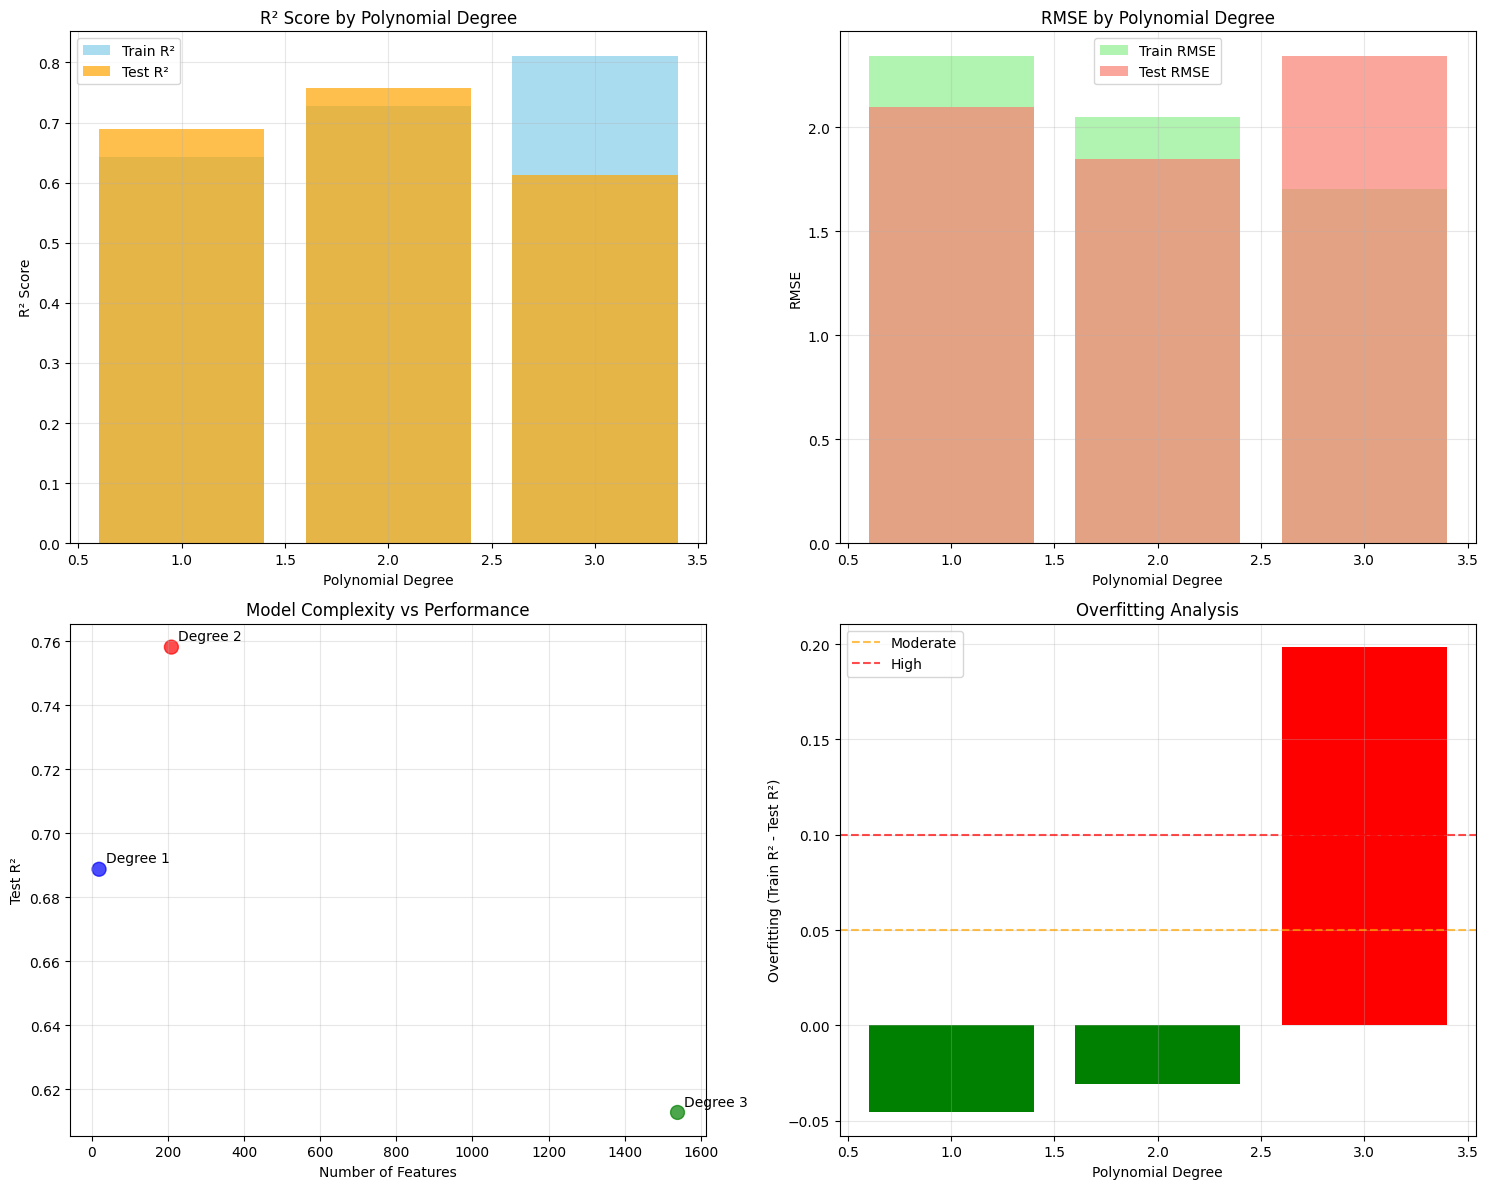

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score Comparison
axes[0, 0].bar(comparison_df['Degree'], comparison_df['Train_R2'],
               alpha=0.7, label='Train R²', color='skyblue')
axes[0, 0].bar(comparison_df['Degree'], comparison_df['Test_R2'],
               alpha=0.7, label='Test R²', color='orange')
axes[0, 0].set_xlabel('Polynomial Degree')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('R² Score by Polynomial Degree')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# RMSE Comparison
axes[0, 1].bar(comparison_df['Degree'], comparison_df['Train_RMSE'],
               alpha=0.7, label='Train RMSE', color='lightgreen')
axes[0, 1].bar(comparison_df['Degree'], comparison_df['Test_RMSE'],
               alpha=0.7, label='Test RMSE', color='salmon')
axes[0, 1].set_xlabel('Polynomial Degree')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('RMSE by Polynomial Degree')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Feature Count vs Performance
axes[1, 0].scatter(comparison_df['Features'], comparison_df['Test_R2'],
                   s=100, c=['blue', 'red', 'green'], alpha=0.7)
for i, row in comparison_df.iterrows():
    axes[1, 0].annotate(f'Degree {int(row["Degree"])}',
                       (row['Features'], row['Test_R2']),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 0].set_xlabel('Number of Features')
axes[1, 0].set_ylabel('Test R²')
axes[1, 0].set_title('Model Complexity vs Performance')
axes[1, 0].grid(True, alpha=0.3)

# Overfitting Analysis
axes[1, 1].bar(comparison_df['Degree'], comparison_df['Overfitting'],
               color=['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
                      for x in comparison_df['Overfitting']])
axes[1, 1].set_xlabel('Polynomial Degree')
axes[1, 1].set_ylabel('Overfitting (Train R² - Test R²)')
axes[1, 1].set_title('Overfitting Analysis')
axes[1, 1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate')
axes[1, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
print("\n FEATURE EXPERIMENTATION")
print("-" * 40)

# Define different feature combinations to test
feature_combinations = {
    'All Features': list(X_processed.columns),
    'Study-focused': ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Motivation_Level',
                     'Tutoring_Sessions', 'Teacher_Quality'],
    'Environmental': ['Parental_Involvement', 'Access_to_Resources', 'Family_Income',
                     'Teacher_Quality', 'School_Type', 'Distance_from_Home'],
    'Personal': ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Motivation_Level',
                'Learning_Disabilities', 'Gender'],
    'Core Academic': ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions'],
    'Lifestyle': ['Sleep_Hours', 'Physical_Activity', 'Extracurricular_Activities',
                 'Internet_Access'],
    'Support System': ['Parental_Involvement', 'Teacher_Quality', 'Family_Income',
                      'Peer_Influence', 'Parental_Education_Level'],
    'Top 5 Correlations': feature_importance.head(5)['Feature'].tolist(),
    'Top 10 Correlations': feature_importance.head(10)['Feature'].tolist(),
    'Without Sleep': [col for col in X_processed.columns if col != 'Sleep_Hours'],
    'Without Participation': [col for col in X_processed.columns
                             if col not in ['Extracurricular_Activities', 'Physical_Activity']],
    'Minimal Set': ['Hours_Studied', 'Previous_Scores', 'Attendance']
}

print(f" Testing {len(feature_combinations)} different feature combinations:")
for name, features in feature_combinations.items():
    print(f"   • {name}: {len(features)} features")



 FEATURE EXPERIMENTATION
----------------------------------------
 Testing 12 different feature combinations:
   • All Features: 19 features
   • Study-focused: 6 features
   • Environmental: 6 features
   • Personal: 6 features
   • Core Academic: 4 features
   • Lifestyle: 4 features
   • Support System: 5 features
   • Top 5 Correlations: 5 features
   • Top 10 Correlations: 10 features
   • Without Sleep: 18 features
   • Without Participation: 17 features
   • Minimal Set: 3 features


In [31]:
feature_results = {}

for combo_name, features in feature_combinations.items():
    # Select features
    X_train_combo = X_train[features]
    X_test_combo = X_test[features]

    # Scale features
    scaler_combo = StandardScaler()
    X_train_combo_scaled = scaler_combo.fit_transform(X_train_combo)
    X_test_combo_scaled = scaler_combo.transform(X_test_combo)

    # Train model
    model_combo = LinearRegression()
    model_combo.fit(X_train_combo_scaled, y_train)

    # Make predictions
    y_train_pred_combo = model_combo.predict(X_train_combo_scaled)
    y_test_pred_combo = model_combo.predict(X_test_combo_scaled)

    # Calculate metrics
    train_r2_combo = r2_score(y_train, y_train_pred_combo)
    test_r2_combo = r2_score(y_test, y_test_pred_combo)
    train_rmse_combo = np.sqrt(mean_squared_error(y_train, y_train_pred_combo))
    test_rmse_combo = np.sqrt(mean_squared_error(y_test, y_test_pred_combo))

    # Cross-validation score
    cv_scores = cross_val_score(LinearRegression(), X_train_combo_scaled, y_train,
                               cv=5, scoring='r2')

    # Store results
    feature_results[combo_name] = {
        'n_features': len(features),
        'train_r2': train_r2_combo,
        'test_r2': test_r2_combo,
        'train_rmse': train_rmse_combo,
        'test_rmse': test_rmse_combo,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'overfitting': train_r2_combo - test_r2_combo,
        'features': features
    }

print(" Feature experimentation completed!")


 Feature experimentation completed!


In [33]:
print("\n FEATURE COMBINATION RESULTS")
print("-" * 50)

# Create results DataFrame
feature_df = pd.DataFrame({
    'Combination': list(feature_results.keys()),
    'Features': [feature_results[k]['n_features'] for k in feature_results.keys()],
    'Test_R2': [feature_results[k]['test_r2'] for k in feature_results.keys()],
    'Train_R2': [feature_results[k]['train_r2'] for k in feature_results.keys()],
    'Test_RMSE': [feature_results[k]['test_rmse'] for k in feature_results.keys()],
    'CV_Mean': [feature_results[k]['cv_mean'] for k in feature_results.keys()],
    'CV_Std': [feature_results[k]['cv_std'] for k in feature_results.keys()],
    'Overfitting': [feature_results[k]['overfitting'] for k in feature_results.keys()]
})

# Sort by Test R²
feature_df = feature_df.sort_values('Test_R2', ascending=False)

print(" TOP PERFORMING FEATURE COMBINATIONS:")
print(feature_df.head(8).to_string(index=False))

print(f"\n Best Feature Combination: {feature_df.iloc[0]['Combination']}")
print(f"   Features: {feature_df.iloc[0]['Features']}")
print(f"   Test R²: {feature_df.iloc[0]['Test_R2']:.4f}")
print(f"   CV Score: {feature_df.iloc[0]['CV_Mean']:.4f} ± {feature_df.iloc[0]['CV_Std']:.4f}")



 FEATURE COMBINATION RESULTS
--------------------------------------------------
 TOP PERFORMING FEATURE COMBINATIONS:
          Combination  Features  Test_R2  Train_R2  Test_RMSE  CV_Mean   CV_Std  Overfitting
        Without Sleep        18 0.689299  0.642962   2.095656 0.648290 0.081881    -0.046338
         All Features        19 0.688769  0.643079   2.097445 0.648362 0.081774    -0.045690
Without Participation        17 0.683798  0.635902   2.114128 0.641287 0.081185    -0.047896
  Top 10 Correlations        10 0.681753  0.630536   2.120954 0.637150 0.080061    -0.051217
   Top 5 Correlations         5 0.652164  0.597282   2.217361 0.604182 0.078655    -0.054882
        Study-focused         6 0.644004  0.590355   2.243218 0.596777 0.079712    -0.053650
        Core Academic         4 0.641357  0.586385   2.251542 0.593197 0.077760    -0.054972
          Minimal Set         3 0.622338  0.560531   2.310471 0.567345 0.077995    -0.061807

 Best Feature Combination: Without Sleep
  

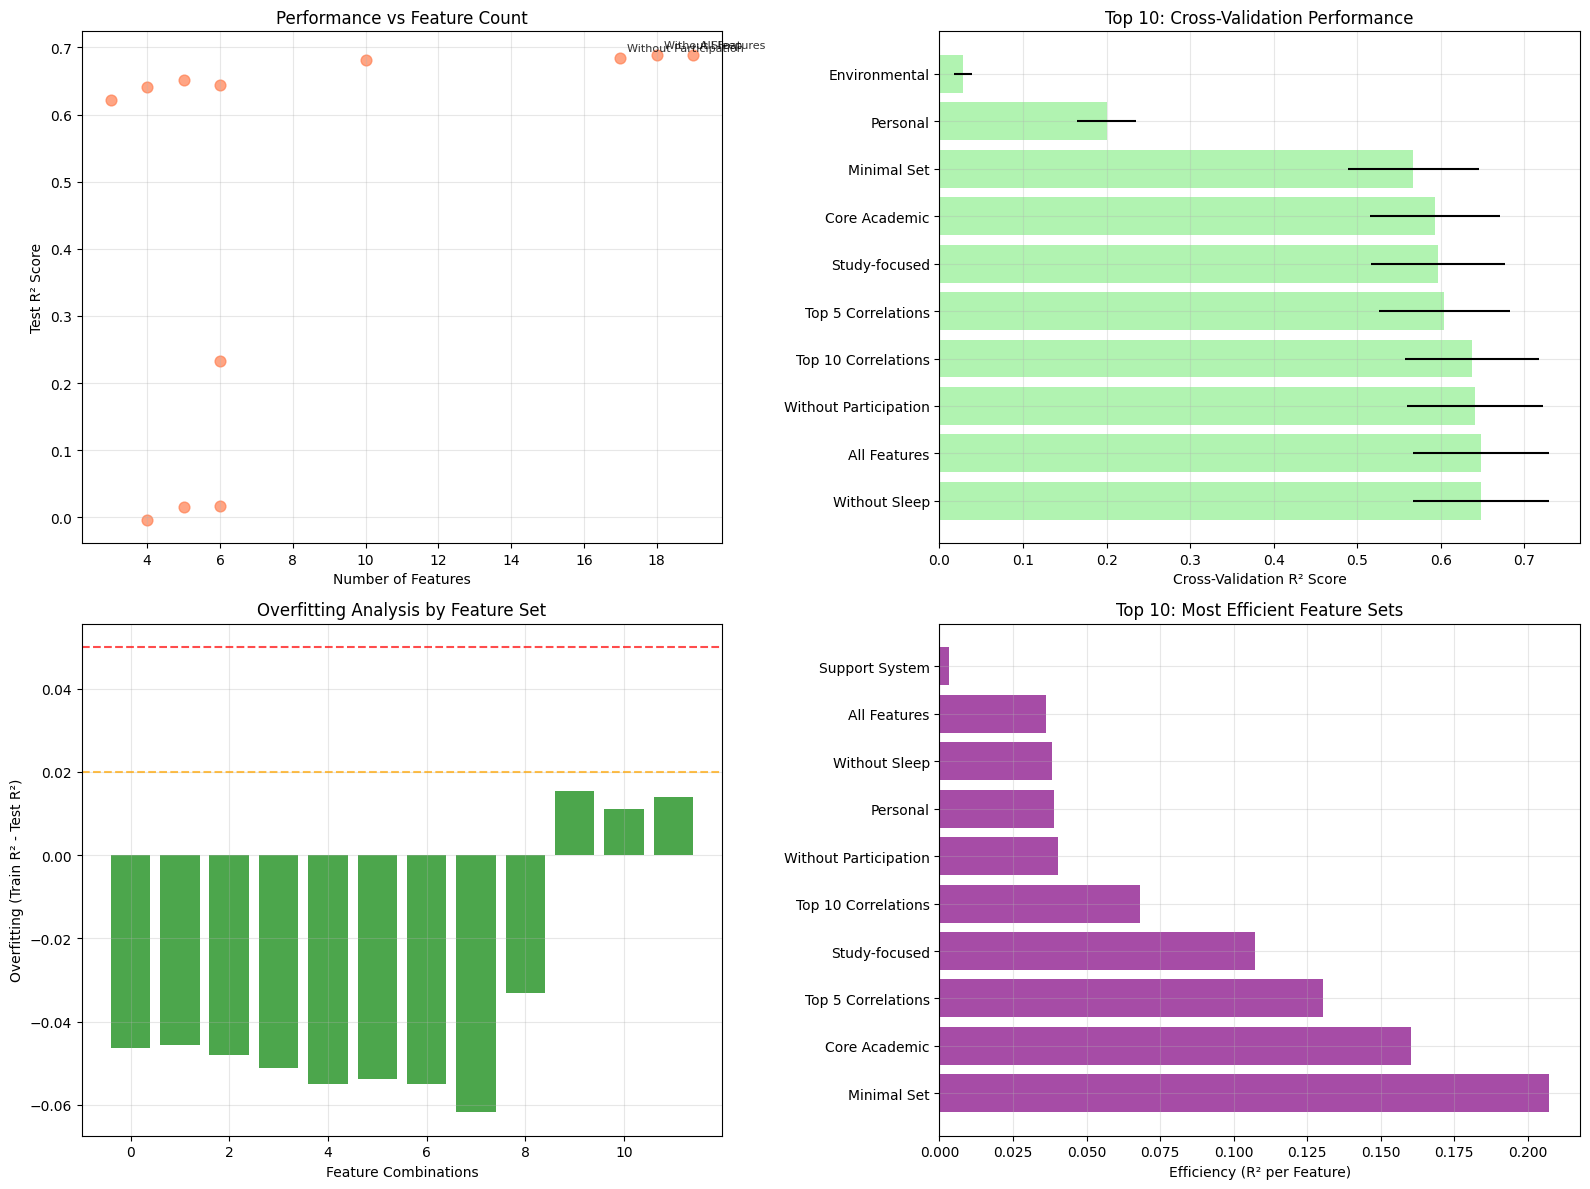

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Performance vs Number of Features
axes[0, 0].scatter(feature_df['Features'], feature_df['Test_R2'],
                   alpha=0.7, s=60, c='coral')
for i, row in feature_df.iterrows():
    if row['Test_R2'] > feature_df['Test_R2'].quantile(0.75):  # Top quartile
        axes[0, 0].annotate(row['Combination'],
                           (row['Features'], row['Test_R2']),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.8)
axes[0, 0].set_xlabel('Number of Features')
axes[0, 0].set_ylabel('Test R² Score')
axes[0, 0].set_title('Performance vs Feature Count')
axes[0, 0].grid(True, alpha=0.3)

# Cross-Validation Performance
top_10 = feature_df.head(10)
axes[0, 1].barh(range(len(top_10)), top_10['CV_Mean'],
                xerr=top_10['CV_Std'], alpha=0.7, color='lightgreen')
axes[0, 1].set_yticks(range(len(top_10)))
axes[0, 1].set_yticklabels(top_10['Combination'], fontsize=10)
axes[0, 1].set_xlabel('Cross-Validation R² Score')
axes[0, 1].set_title('Top 10: Cross-Validation Performance')
axes[0, 1].grid(True, alpha=0.3)

# Overfitting Analysis
colors = ['green' if x < 0.02 else 'orange' if x < 0.05 else 'red'
          for x in feature_df['Overfitting']]
axes[1, 0].bar(range(len(feature_df)), feature_df['Overfitting'],
               color=colors, alpha=0.7)
axes[1, 0].set_xlabel('Feature Combinations')
axes[1, 0].set_ylabel('Overfitting (Train R² - Test R²)')
axes[1, 0].set_title('Overfitting Analysis by Feature Set')
axes[1, 0].axhline(y=0.02, color='orange', linestyle='--', alpha=0.7)
axes[1, 0].axhline(y=0.05, color='red', linestyle='--', alpha=0.7)
axes[1, 0].grid(True, alpha=0.3)

# Efficiency (Performance per Feature)
feature_df['Efficiency'] = feature_df['Test_R2'] / feature_df['Features']
top_efficient = feature_df.nlargest(10, 'Efficiency')
axes[1, 1].barh(range(len(top_efficient)), top_efficient['Efficiency'],
                alpha=0.7, color='purple')
axes[1, 1].set_yticks(range(len(top_efficient)))
axes[1, 1].set_yticklabels(top_efficient['Combination'], fontsize=10)
axes[1, 1].set_xlabel('Efficiency (R² per Feature)')
axes[1, 1].set_title('Top 10: Most Efficient Feature Sets')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [36]:
print("\n FINAL MODEL COMPARISON")
print("-" * 40)

# Compare original model, best polynomial, and best feature combination
best_feature_combo = feature_df.iloc[0]['Combination']
best_poly_degree = best_degree

comparison_models = {
    'Original Linear': {
        'r2': test_r2,
        'rmse': test_rmse,
        'features': len(X_processed.columns),
        'type': 'Linear (All Features)'
    },
    f'Polynomial Degree {best_poly_degree}': {
        'r2': poly_results[best_poly_degree]['test_r2'],
        'rmse': poly_results[best_poly_degree]['test_rmse'],
        'features': poly_results[best_poly_degree]['n_features'],
        'type': f'Polynomial {best_poly_degree} (All Features)'
    },
    f'Best Features ({best_feature_combo})': {
        'r2': feature_results[best_feature_combo]['test_r2'],
        'rmse': feature_results[best_feature_combo]['test_rmse'],
        'features': feature_results[best_feature_combo]['n_features'],
        'type': f'Linear ({best_feature_combo})'
    }
}

print(" FINAL COMPARISON:")
for model_name, metrics in comparison_models.items():
    print(f"\n{model_name}:")
    print(f"   Test R²: {metrics['r2']:.4f}")
    print(f"   Test RMSE: {metrics['rmse']:.4f}")
    print(f"   Features: {metrics['features']}")
    print(f"   Type: {metrics['type']}")

# Find best overall model
best_model = max(comparison_models.items(), key=lambda x: x[1]['r2'])
print(f"\n OVERALL BEST MODEL: {best_model[0]}")
print(f"   Test R²: {best_model[1]['r2']:.4f}")
print(f"   Improvement over baseline: {((best_model[1]['r2'] - test_r2) / test_r2 * 100):+.1f}%")

# BONUS CELL 10: Key Insights and Recommendations
print("\n KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

print(" POLYNOMIAL REGRESSION INSIGHTS:")
if poly_results[2]['test_r2'] > poly_results[1]['test_r2']:
    print("    Polynomial features improve model performance")
    print(f"   • Best degree: {best_degree}")
    print(f"   • Performance gain: {((poly_results[best_degree]['test_r2'] - poly_results[1]['test_r2']) / poly_results[1]['test_r2'] * 100):+.1f}%")
else:
    print("    Polynomial features may cause overfitting")
    print("   • Linear model performs better on test data")

print(f"\n FEATURE SELECTION INSIGHTS:")
print(f"   • Most efficient: {top_efficient.iloc[0]['Combination']} ({top_efficient.iloc[0]['Features']} features)")
print(f"   • Best performance: {feature_df.iloc[0]['Combination']} (R²: {feature_df.iloc[0]['Test_R2']:.4f})")
print(f"   • Core academic features alone achieve {feature_results['Core Academic']['test_r2']:.4f} R²")

print(f"\n PRACTICAL RECOMMENDATIONS:")
if feature_results['Core Academic']['test_r2'] > 0.8 * feature_results['All Features']['test_r2']:
    print("    Focus on core academic factors (Hours, Attendance, Previous Scores)")
    print("   • These provide most of the predictive power with fewer features")
else:
    print("    Use comprehensive feature set for best predictions")
    print("   • All factors contribute meaningfully to student performance")

sleep_impact = abs(feature_results['All Features']['test_r2'] - feature_results['Without Sleep']['test_r2'])
if sleep_impact > 0.01:
    print(f"    Sleep Hours is important (removing it reduces R² by {sleep_impact:.3f})")
else:
    print("    Sleep Hours has minimal impact on predictions")

print(f"\n FINAL RECOMMENDATION:")
print(f"   Use: {best_model[0]}")
print(f"   Expected accuracy: {best_model[1]['r2']:.1%} of variance explained")
print(f"   Average prediction error: ±{best_model[1]['rmse']:.1f} points")

print("\n" + "="*50)
print(" BONUS ANALYSIS COMPLETED!")
print("   • Tested polynomial regression up to degree 3")
print(f"   • Experimented with {len(feature_combinations)} feature combinations")
print("   • Identified optimal model configuration")
print("   • Provided actionable insights for student performance prediction")
print("="*50)


 FINAL MODEL COMPARISON
----------------------------------------
 FINAL COMPARISON:

Original Linear:
   Test R²: 0.6888
   Test RMSE: 2.0974
   Features: 19
   Type: Linear (All Features)

Polynomial Degree 2:
   Test R²: 0.7581
   Test RMSE: 1.8489
   Features: 209
   Type: Polynomial 2 (All Features)

Best Features (Without Sleep):
   Test R²: 0.6893
   Test RMSE: 2.0957
   Features: 18
   Type: Linear (Without Sleep)

 OVERALL BEST MODEL: Polynomial Degree 2
   Test R²: 0.7581
   Improvement over baseline: +10.1%

 KEY INSIGHTS & RECOMMENDATIONS
 POLYNOMIAL REGRESSION INSIGHTS:
    Polynomial features improve model performance
   • Best degree: 2
   • Performance gain: +10.1%

 FEATURE SELECTION INSIGHTS:
   • Most efficient: Minimal Set (3 features)
   • Best performance: Without Sleep (R²: 0.6893)
   • Core academic features alone achieve 0.6414 R²

 PRACTICAL RECOMMENDATIONS:
    Focus on core academic factors (Hours, Attendance, Previous Scores)
   • These provide most of the 